#### PCA Wine quality project

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [101]:
wine = pd.read_csv("Wine_Quality_Data.csv")

In [102]:
wine.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [103]:
wine.keys()

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [104]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [105]:
wine.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

<Axes: xlabel='color'>

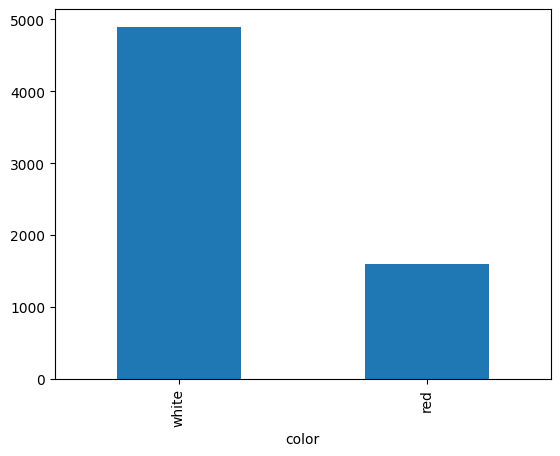

In [106]:
wine['color'].value_counts().plot(kind='bar')

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

wine['color'] = le.fit_transform(wine['color'])

In [108]:
df = pd.DataFrame(wine)

### it is difficult to visualize soo many features, i.e., 13, hence we use PCA to reduce number of columns so it can be represented by a scatter plot. to perform further, we need to standardize the data so that all the data has single unit variance

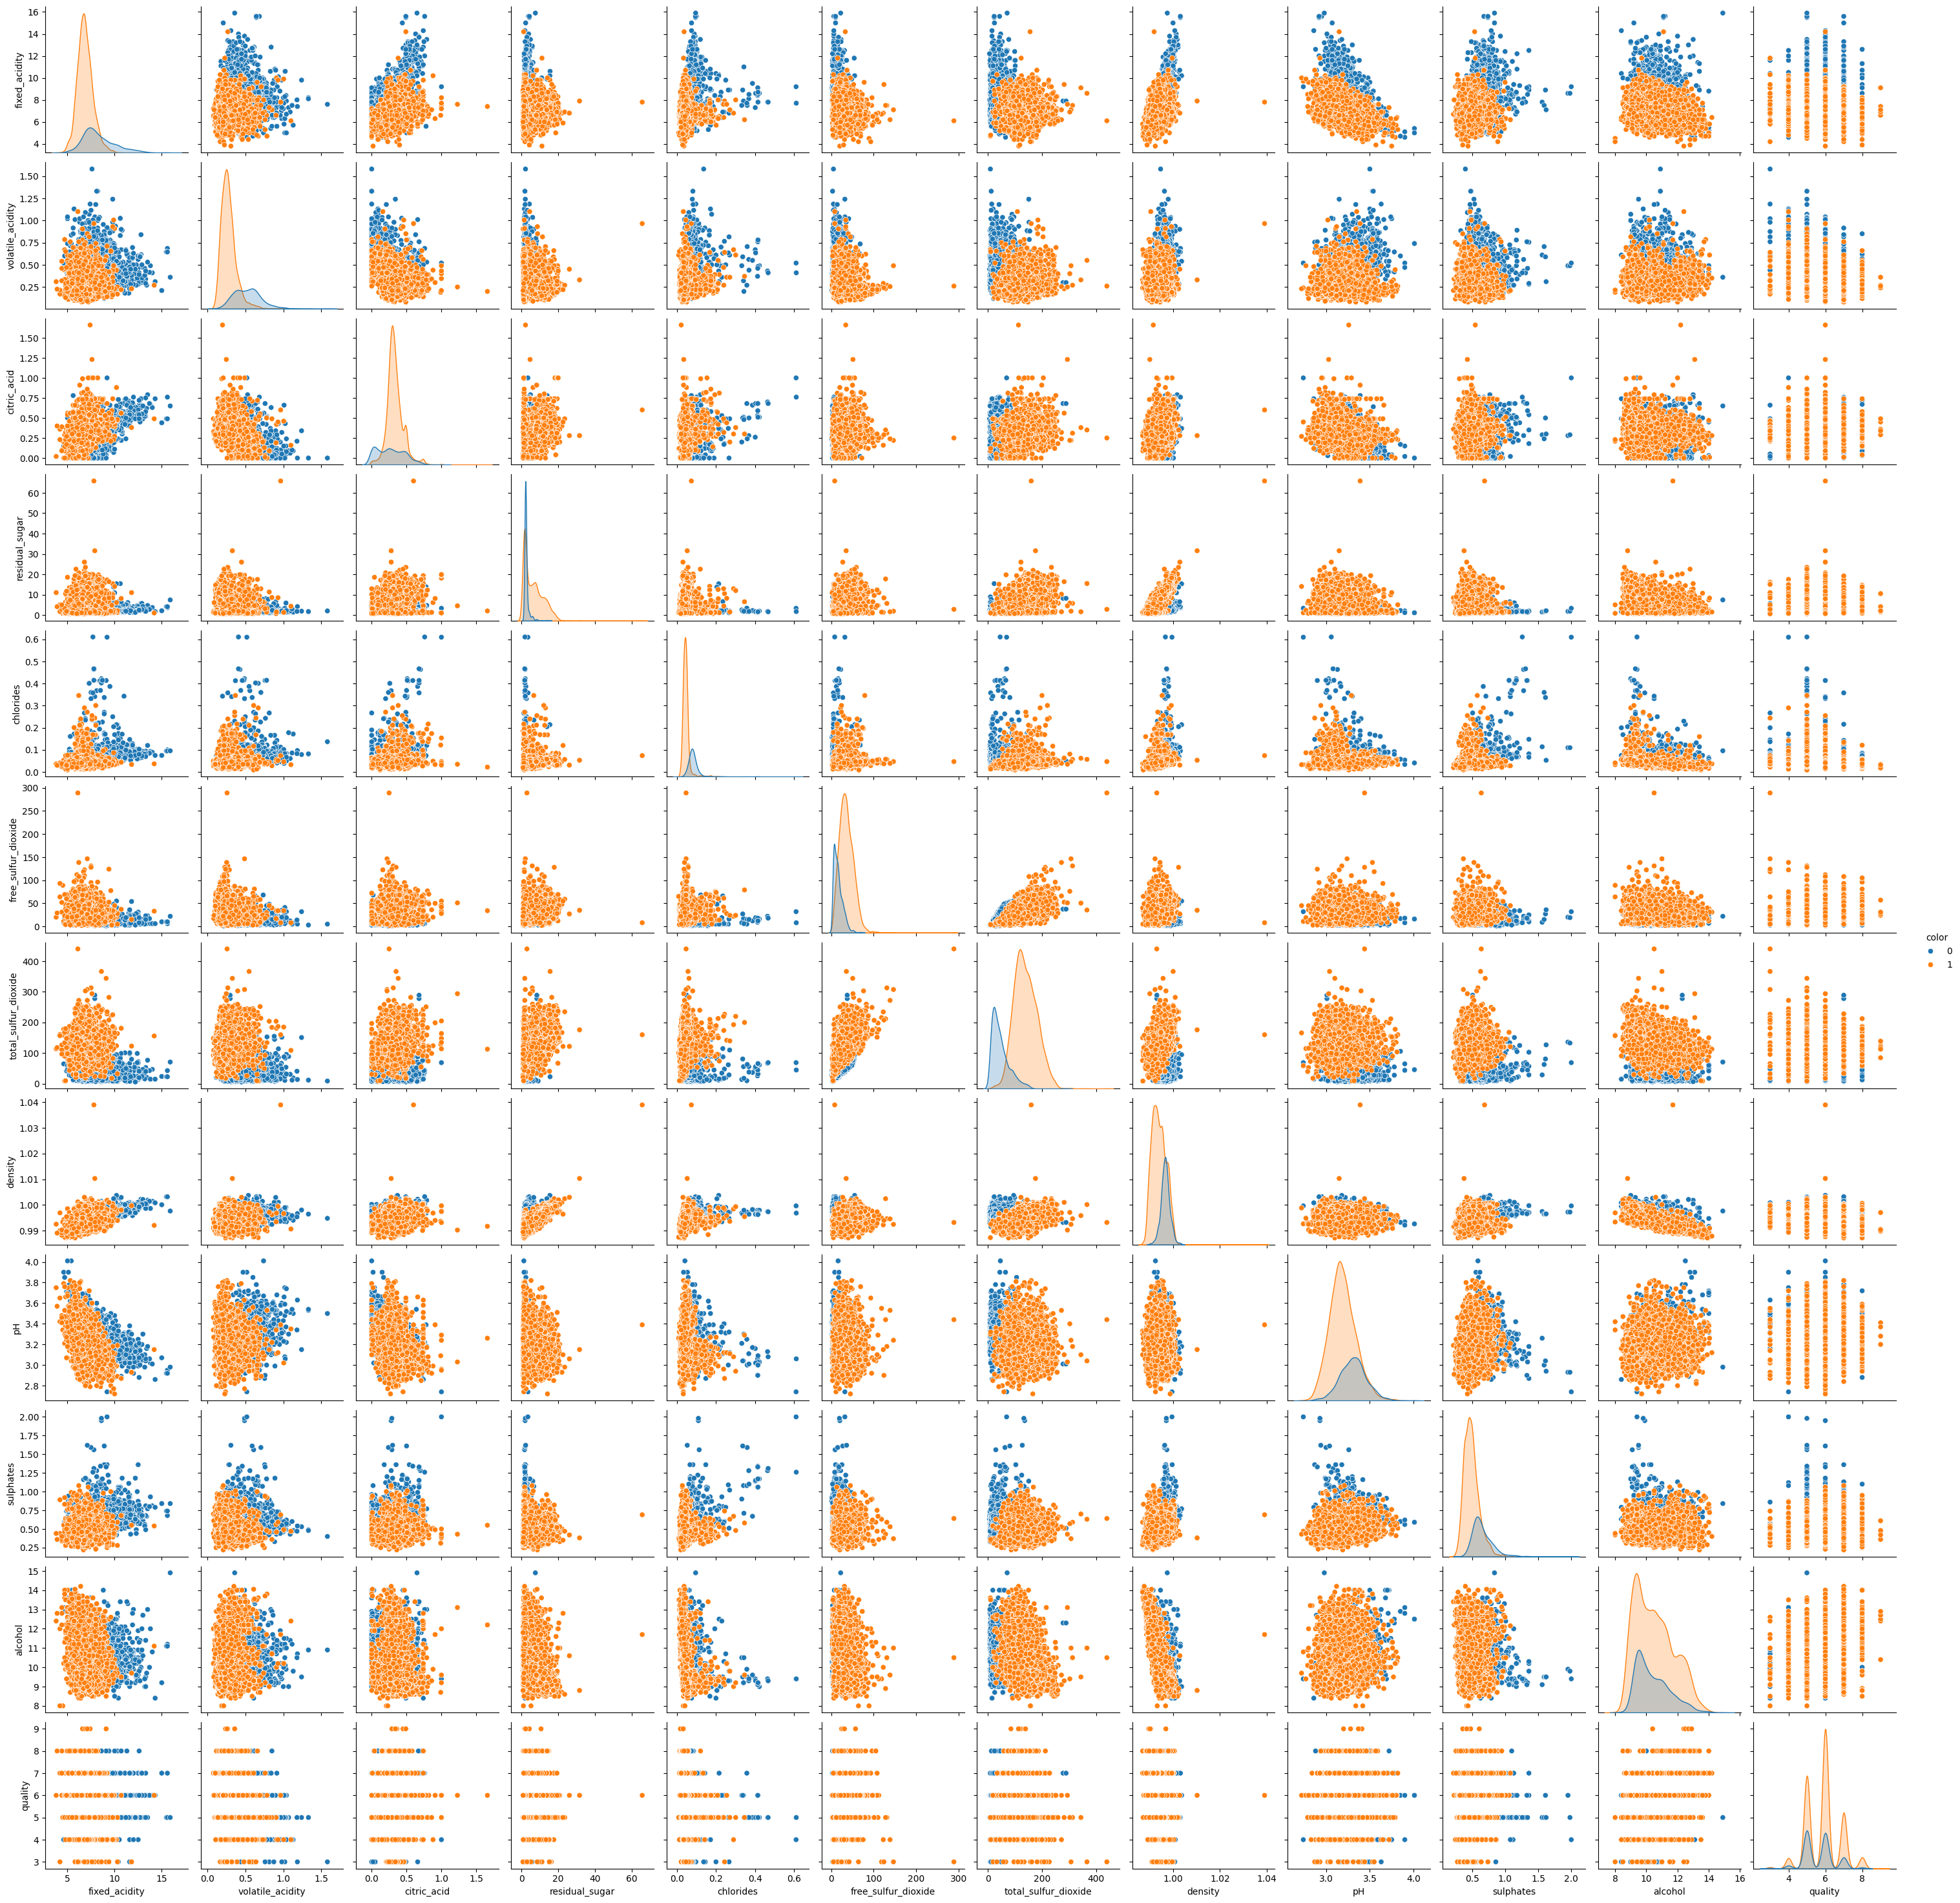

In [109]:
sns.pairplot(wine, hue='color')

## Standardizing

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_encode = df.columns[:12]  # Select the column names for encoding
df[feature_encode] = scaler.fit_transform(df[feature_encode])


In [111]:
df.head(2)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             -1.10014             -1.446359  1.034993  1.813090   0.193097   
1             -0.31132             -0.862469  0.701486 -0.115073   0.999579   

    alcohol  quality  color  
0 -0.915464 -0.93723      0  
1 -0.580068 -0.93723      0

## Checking optimal number of clusters

In [112]:
covariance_matrix = PCA(n_components=13)

In [113]:
covariance_matrix.fit(df)

PCA(n_components=13)

In [114]:
variance = covariance_matrix.explained_variance_ratio_
# simply printing variance would give decimal values, hence we use np.round
var = np.round(variance, decimals=3)
# printing var would give individual scores, hence we use np.cumsum
cumulative_var = np.cumsum((var)*100)

In [115]:
cumulative_var

array([ 26.1,  47.9,  61.4,  70.2,  77.1,  82.5,  87.1,  91.3,  95.1,
        97.6,  99.5,  99.9, 100. ])

## Plot the graph

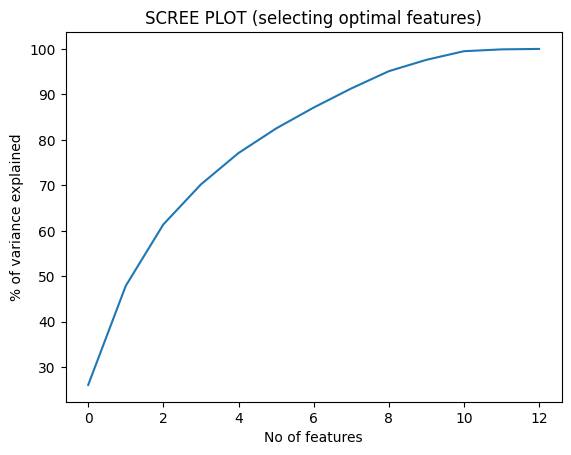

In [116]:
plt.plot(cumulative_var)
plt.title('SCREE PLOT (selecting optimal features)')
plt.xlabel('No of features')
plt.ylabel('% of variance explained')
plt.show()

## acc to the graph, the saturation point reaches when the no. of features are 5 and after that, the explained variance becomes saturated. hence, we select 5 as the number of optimal features. Running PCA with 5 features

In [117]:
pca = PCA(n_components=5)

In [118]:
pca.fit(df)

PCA(n_components=5)

In [119]:
df_pca = pca.transform(df)

In [120]:
df_pca.shape

(6497, 5)

In [121]:
df_pca.shape

(6497, 5)

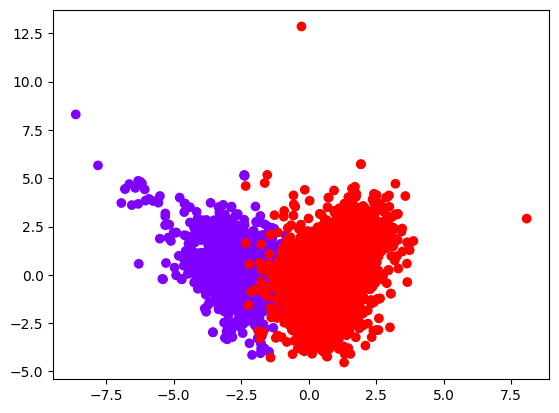

In [122]:
plt.scatter(df_pca[:,0], df_pca[:,1], c=df['color'], cmap='rainbow')
plt.show()

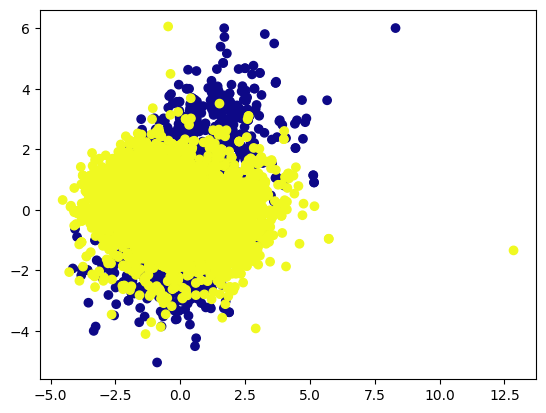

In [123]:
plt.scatter(df_pca[:,1], df_pca[:,2], c=df['color'], cmap='plasma')
plt.show()

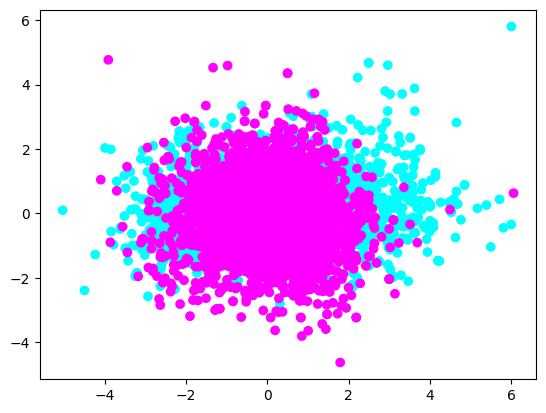

In [124]:
plt.scatter(df_pca[:,2], df_pca[:,3], c=df['color'], cmap='cool')  # inferno isn't a good fit :(
plt.show()

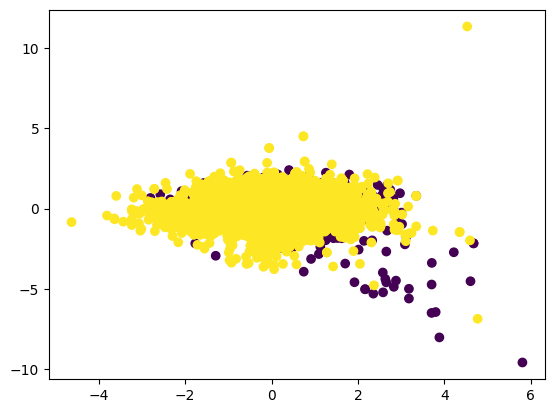

In [125]:
plt.scatter(df_pca[:,3], df_pca[:,4], c=df['color'], cmap='viridis')
plt.show()

In [126]:
from mpl_toolkits.mplot3d import Axes3D

## Plotting all 6 graphs for 5 features, in 3D plot

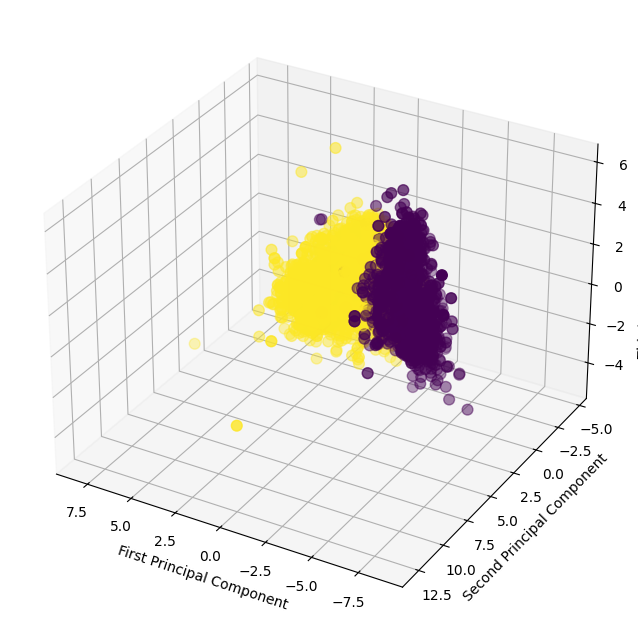

In [127]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:,0], df_pca[:,1], df_pca[:,2], c=df['color'],s=60)
#ax.legend(['Malign'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(30, 120)


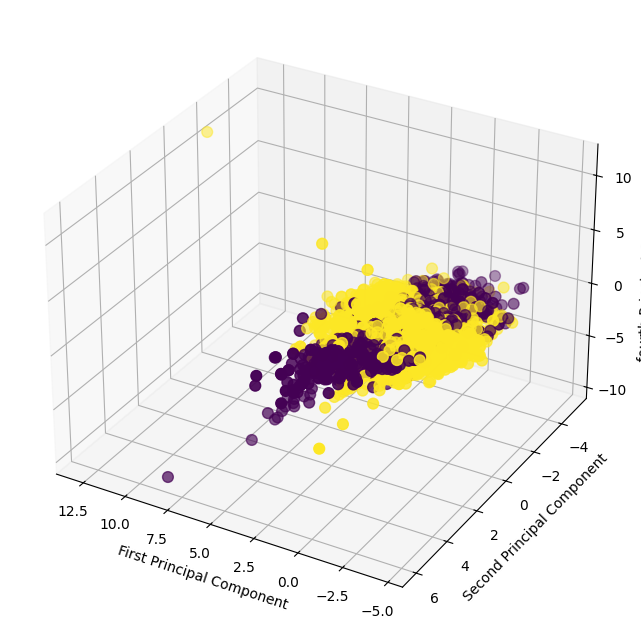

In [128]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:,1], df_pca[:,2], df_pca[:,4], c=df['color'],s=60)
#ax.legend(['Malign'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('fourth Principal Component')
ax.view_init(30, 120)


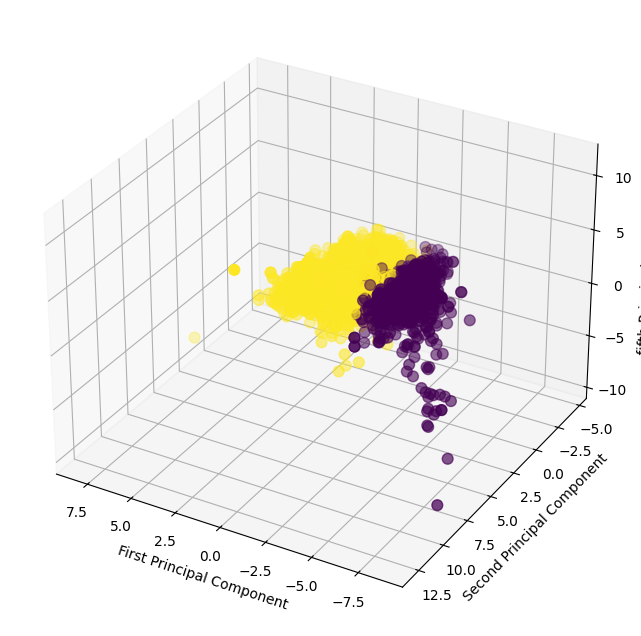

In [129]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:,0], df_pca[:,1], df_pca[:,4], c=df['color'],s=60)
#ax.legend(['Malign'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('fifth Principal Component')
ax.view_init(30, 120)


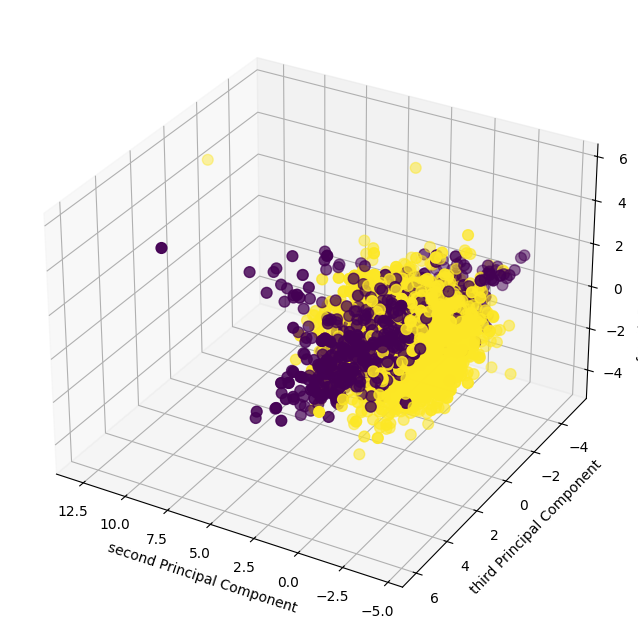

In [130]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:,1], df_pca[:,2], df_pca[:,3], c=df['color'],s=60)
#ax.legend(['Malign'])
ax.set_xlabel('second Principal Component')
ax.set_ylabel('third Principal Component')
ax.set_zlabel('fourth Principal Component')
ax.view_init(30, 120)


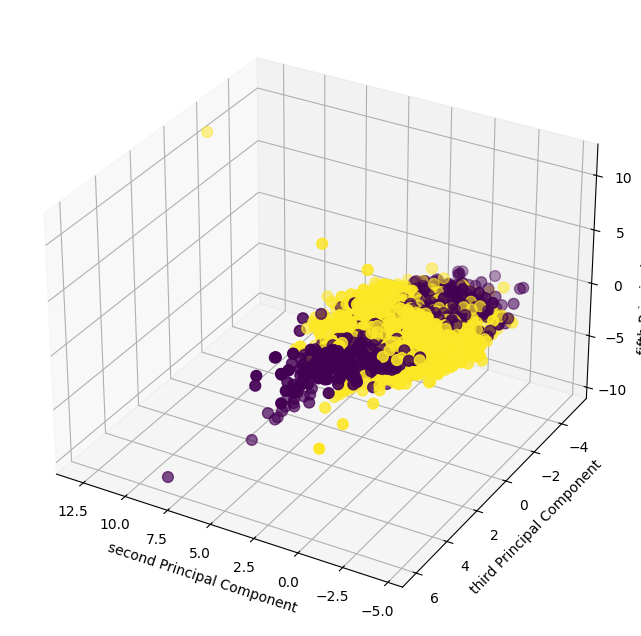

In [131]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:,1], df_pca[:,2], df_pca[:,4], c=df['color'],s=60)
#ax.legend(['Malign'])
ax.set_xlabel('second Principal Component')
ax.set_ylabel('third Principal Component')
ax.set_zlabel('fifth Principal Component')
ax.view_init(30, 120)


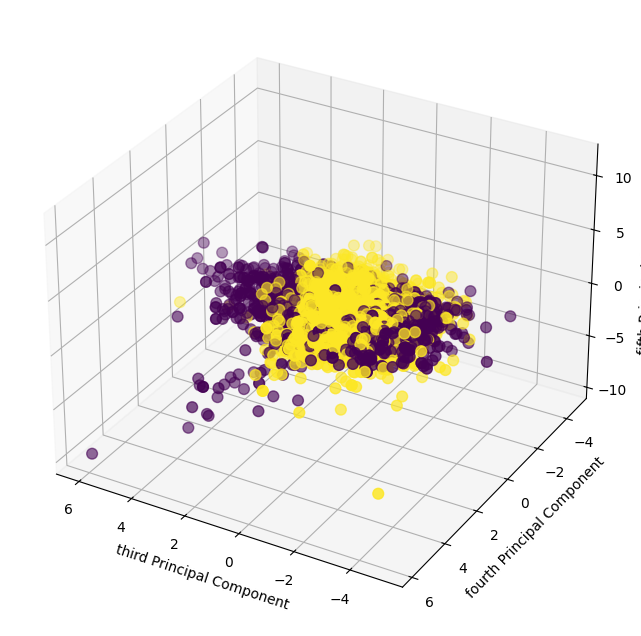

In [132]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:,2], df_pca[:,3], df_pca[:,4], c=df['color'],s=60)
#ax.legend(['Malign'])
ax.set_xlabel('third Principal Component')
ax.set_ylabel('fourth Principal Component')
ax.set_zlabel('fifth Principal Component')
ax.view_init(30, 120)


In [133]:
# Calculate and display the explained variance and explained variance ratio for each principal component
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance (per component):", explained_variance)
print("Explained Variance Ratio (per component):", explained_variance_ratio)
print("Total Explained Variance Ratio (sum):", explained_variance_ratio.sum())

Explained Variance (per component): [3.17829941 2.6553823  1.64177359 1.07118644 0.8424609 ]
Explained Variance Ratio (per component): [0.26078531 0.217879   0.13471054 0.08789282 0.06912546]
Total Explained Variance Ratio (sum): 0.7703931198627422



### Conclusion
After applying Principal Component Analysis (PCA) to the wine quality dataset, we successfully reduced the dimensionality from 13 features to 5 principal components. The cumulative explained variance shows that these 5 components capture the majority of the variance in the data, making them suitable for further analysis and visualization. The scatter and 3D plots of the principal components reveal clear separation patterns based on wine color, indicating that PCA effectively highlights the underlying structure of the dataset.

### Recommendation
- For further analysis, use the 5 principal components as input features for clustering or classification algorithms to improve computational efficiency and potentially enhance model performance.
- Consider exploring other dimensionality reduction techniques or feature selection methods if additional interpretability or performance is required.
- Visualizations using the principal components can be valuable for exploratory data analysis and for communicating results to stakeholders.